In [9]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [10]:
## read in data and drop columns that aren't needed
df = pd.read_csv('aqi_utah_arizona.csv')
drops = ['state_code','county_code','parameter_code','cbsa_code','cbsa','observation_count']
df = df.drop(drops,axis=1)

In [11]:
## drop rows with a validity indicator equal to N (questionable validity of data)
df = df[df['validity_indicator']=='Y']
df = df.drop(['validity_indicator'], axis=1)

In [12]:
## drop rows where the observation percent is less than 90
df = df[df['observation_percent'] > 89]
df = df.drop(['observation_percent'], axis=1)

In [13]:
## drop other columns that aren't needed
df = df.drop(['event_type','first_max_value','first_max_hour','local_site_name'],axis=1)

In [14]:
df.head()

,site_number,latitude,longitude,parameter,date_local,arithmetic_mean,aqi,state,county,city
0,7020,33.488131,-111.855443,PM2.5 - Local Conditions,2017-01-01,5.9,25.0,Arizona,Maricopa,Scottsdale
1,7020,33.488131,-111.855443,PM2.5 - Local Conditions,2017-01-07,2.0,8.0,Arizona,Maricopa,Scottsdale
2,7020,33.488131,-111.855443,PM2.5 - Local Conditions,2017-01-13,7.8,33.0,Arizona,Maricopa,Scottsdale
3,7020,33.488131,-111.855443,PM2.5 - Local Conditions,2017-01-19,8.6,36.0,Arizona,Maricopa,Scottsdale
4,7020,33.488131,-111.855443,PM2.5 - Local Conditions,2017-01-25,4.0,17.0,Arizona,Maricopa,Scottsdale


In [15]:
## pivot so that the parameters are columns.   
index_vars = ['site_number','latitude','longitude','date_local','state','county','city']
#index_vars = ['date_local','state','county','city']
df = df.pivot_table(index=index_vars, columns='parameter', values='aqi').reset_index()

In [16]:
df.head()

parameter,site_number,latitude,longitude,date_local,state,county,city,Carbon monoxide,Nitrogen dioxide (NO2),Ozone,PM10 Total 0-10um STP,PM2.5 - Local Conditions,Sulfur dioxide
0,2,40.253611,-111.663056,2017-01-01,Utah,Utah,Provo,NaN,43.0,27.0,34.5,83.5,NaN
1,2,40.253611,-111.663056,2017-01-02,Utah,Utah,Provo,5.0,24.0,23.0,8.0,22.5,NaN
2,2,40.253611,-111.663056,2017-01-03,Utah,Utah,Provo,8.0,45.0,18.5,17.0,43.0,NaN
3,2,40.253611,-111.663056,2017-01-04,Utah,Utah,Provo,8.0,41.0,31.0,4.0,4.5,NaN
4,2,40.253611,-111.663056,2017-01-05,Utah,Utah,Provo,3.0,27.0,29.0,7.0,19.0,NaN


In [17]:
df.shape

(67636, 13)

In [18]:
# Compute the API Score as the maximum of the pollutants 
df['aqi'] = df[['Carbon monoxide', 'Nitrogen dioxide (NO2)', 'Ozone',
       'PM10 Total 0-10um STP', 'PM2.5 - Local Conditions', 'Sulfur dioxide']].max(axis=1)

In [19]:
az = df[df['state']=='Arizona']
ut = df[df['state']=='Utah']

In [20]:
#  Look the unique sites for Arizona (this cell) and Utah (next cell)
az_sites = az.drop_duplicates(subset=['site_number','latitude','longitude','state','county','city'])
az_sites = az_sites.drop(['date_local','aqi'], axis=1)
az_sites = az_sites.reset_index()

In [21]:
ut_sites = ut.drop_duplicates(subset=['site_number','latitude','longitude','state','county','city'])
ut_sites = ut_sites.drop(['date_local','aqi'], axis=1)
ut_sites = ut_sites.reset_index()

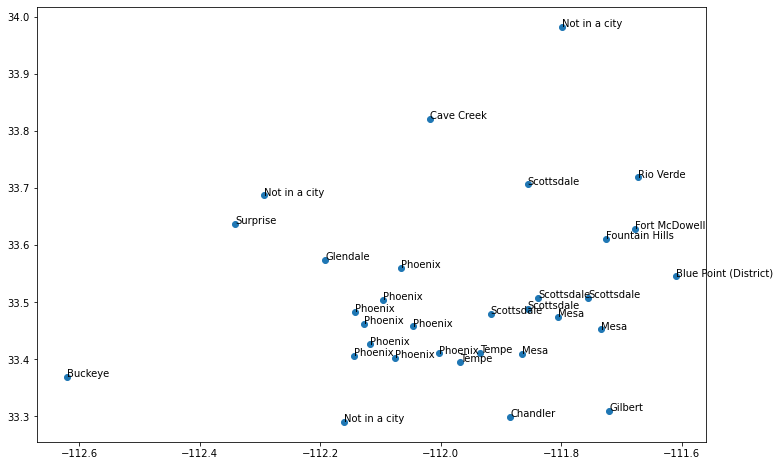

In [22]:
## Plot of Arizona Sites
plt.figure(figsize=(12,8))
plt.scatter(az_sites.longitude, az_sites.latitude)
#plt.text(az_sites['longitude'][0], az_sites['latitude'][0], az_sites['city'][0])
for i in range(az_sites.shape[0]):
    plt.text(az_sites.longitude[i], az_sites.latitude[i], az_sites.city[i])

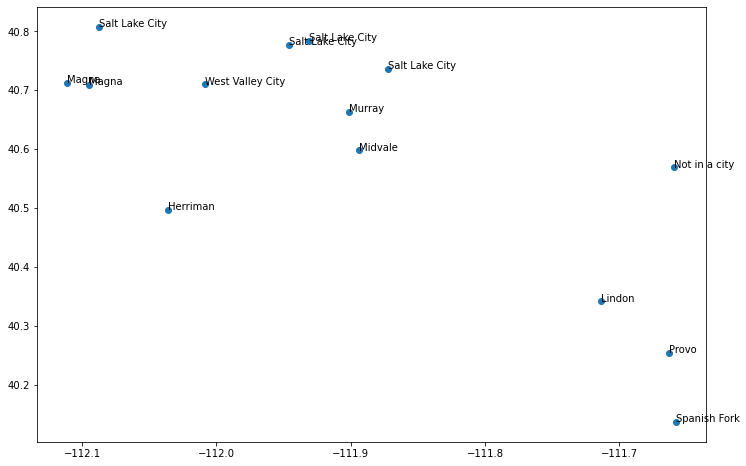

In [23]:
## Plot of Utah sites
plt.figure(figsize=(12,8))
plt.scatter(ut_sites.longitude, ut_sites.latitude)
#plt.text(az_sites['longitude'][0], az_sites['latitude'][0], az_sites['city'][0])
for i in range(ut_sites.shape[0]):
    plt.text(ut_sites.longitude[i], ut_sites.latitude[i], ut_sites.city[i])

In [24]:
## For now just keep Mesa, Chandler, Gilbert, Tempe, Lindon, Provo, Spanish Fork

In [25]:
cities_to_keep = ['Mesa','Chandler','Gilbert','Tempe','Lindon','Provo', 'Spanish Fork']

In [26]:
df = df[df['city'].apply(lambda x: x in cities_to_keep)]

In [27]:
df['date'] = pd.to_datetime(df['date_local'])

In [34]:
df.head()

parameter,site_number,latitude,longitude,state,county,city,Carbon monoxide,Nitrogen dioxide (NO2),Ozone,PM10 Total 0-10um STP,PM2.5 - Local Conditions,Sulfur dioxide,aqi,date,year,month
0,2,40.253611,-111.663056,Utah,Utah,Provo,NaN,43.0,27.0,34.5,83.5,NaN,83.5,2017-01-01,2017,1
1,2,40.253611,-111.663056,Utah,Utah,Provo,5.0,24.0,23.0,8.0,22.5,NaN,24.0,2017-01-02,2017,1
2,2,40.253611,-111.663056,Utah,Utah,Provo,8.0,45.0,18.5,17.0,43.0,NaN,45.0,2017-01-03,2017,1
3,2,40.253611,-111.663056,Utah,Utah,Provo,8.0,41.0,31.0,4.0,4.5,NaN,41.0,2017-01-04,2017,1
4,2,40.253611,-111.663056,Utah,Utah,Provo,3.0,27.0,29.0,7.0,19.0,NaN,29.0,2017-01-05,2017,1


In [33]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month


In [31]:
df = df.drop('date_local', axis=1)

In [35]:
# save the cleaned data that I will work with later
df.to_csv('data.csv', index=None)